In [84]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

estates = pd.read_csv(r"synthetic_real_estate_data.csv")
estates

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,7 neighborhood rating
0,1,1996,29,1679,7,25.033,121.564,700153.628128,5
1,2,2009,16,261,7,25.033,121.565,702528.674506,4
2,3,2018,7,301,5,25.034,121.566,502715.023921,3
3,4,2004,21,1095,7,25.035,121.567,700507.032705,5
4,5,2000,25,369,6,25.036,121.568,601435.367421,4
...,...,...,...,...,...,...,...,...,...
95,96,1997,28,1986,7,25.037,121.569,700121.778596,4
96,97,2018,7,915,5,25.038,121.570,500101.751659,5
97,98,2010,15,1394,5,25.039,121.571,500643.626799,3
98,99,1996,29,555,6,25.040,121.572,601622.374878,5


In [76]:
ct = make_column_transformer(
    (MinMaxScaler(),["X1 transaction date","X2 house age","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"])
)

X = estates.drop(["No","Y house price of unit area"],axis=1)
y = estates["Y house price of unit area"]

X = estates
y = estates

X_train, X_test, y_train, y_test = train_test_split(X,y)
ct.fit(X_train)
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)
X_train_normalized

array([[0.        , 1.        , 0.82202899, 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.17043478, 0.66666667, 0.875     ,
        0.88888889],
       [0.86363636, 0.13636364, 0.76753623, 0.        , 1.        ,
        1.        ],
       [0.18181818, 0.81818182, 0.0626087 , 0.66666667, 0.375     ,
        0.44444444],
       [1.        , 0.        , 0.02318841, 0.33333333, 0.125     ,
        0.22222222],
       [0.59090909, 0.40909091, 0.        , 1.        , 0.        ,
        0.11111111],
       [1.        , 0.        , 0.37913043, 0.33333333, 0.625     ,
        0.66666667],
       [0.36363636, 0.63636364, 0.48347826, 1.        , 0.25      ,
        0.33333333],
       [1.        , 0.        , 0.37913043, 0.33333333, 0.625     ,
        0.66666667],
       [0.63636364, 0.36363636, 0.65681159, 0.33333333, 0.75      ,
        0.77777778],
       [1.        , 0.        , 0.37913043, 0.33333333, 0.625     ,
        0.66666667],
       [1.        , 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 26.7632 - mae: 26.7632
[26.76317596435547, 26.76317596435547]


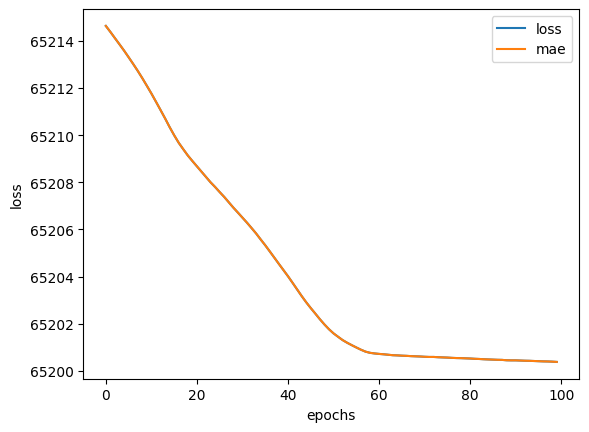

In [89]:
model_estates_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)]
)
model_estates_1.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]
                        )
history = model_estates_1.fit(X_train_normalized,y_train,epochs = 100,verbose=0)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_estates_1.evaluate(X_test_normalized, y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 21.8709 - mae: 21.8709
[21.870943069458008, 21.870943069458008]


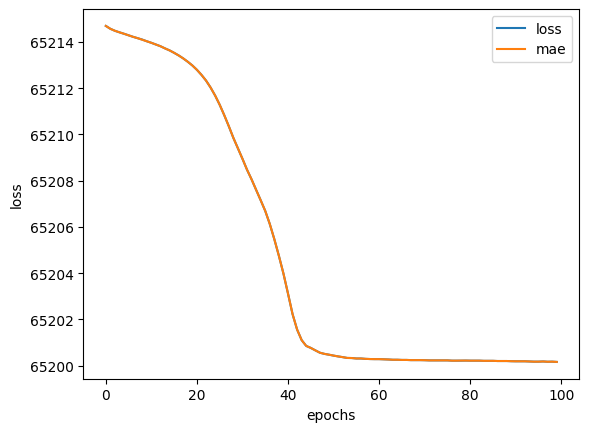

In [91]:
model_estates_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)]
)

model_estates_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]
                        )

history_2 = model_estates_2.fit(X_train_normalized,y_train,epochs = 100,verbose=0)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_estates_2.evaluate(X_test_normalized, y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 24.0128 - mae: 24.0128
[24.012805938720703, 24.012805938720703]


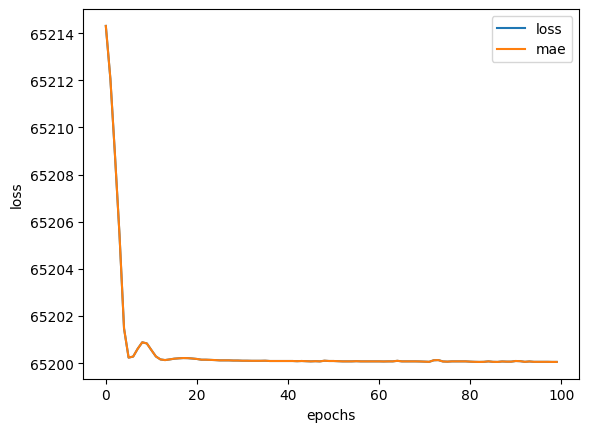

In [92]:
model_estates_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)]
)

model_estates_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                        metrics=["mae"]
                        )

history_3 = model_estates_3.fit(X_train_normalized,y_train,epochs = 100,verbose=0)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_estates_3.evaluate(X_test_normalized, y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 68460.5938 - mae: 68460.5938
[68460.59375, 68460.59375]


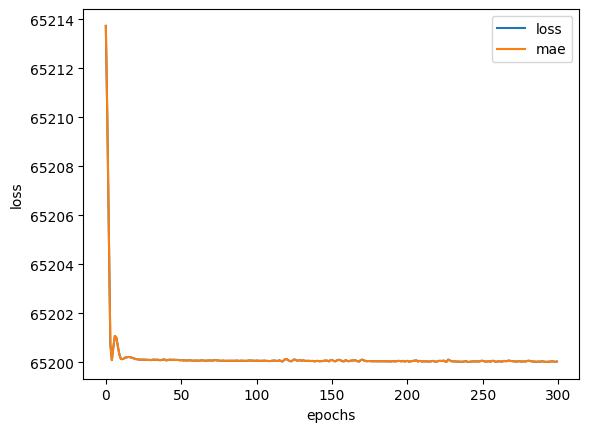

In [80]:
model_estates_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)]
)
model_estates_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                        metrics=["mae"]
                        )
history = model_estates_4.fit(X_train_normalized,y_train,epochs = 300,verbose=0)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
print(model_estates_4.evaluate(X_test_normalized, y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Length of y_predict: 25
Length of y_test: 25
25 25 25


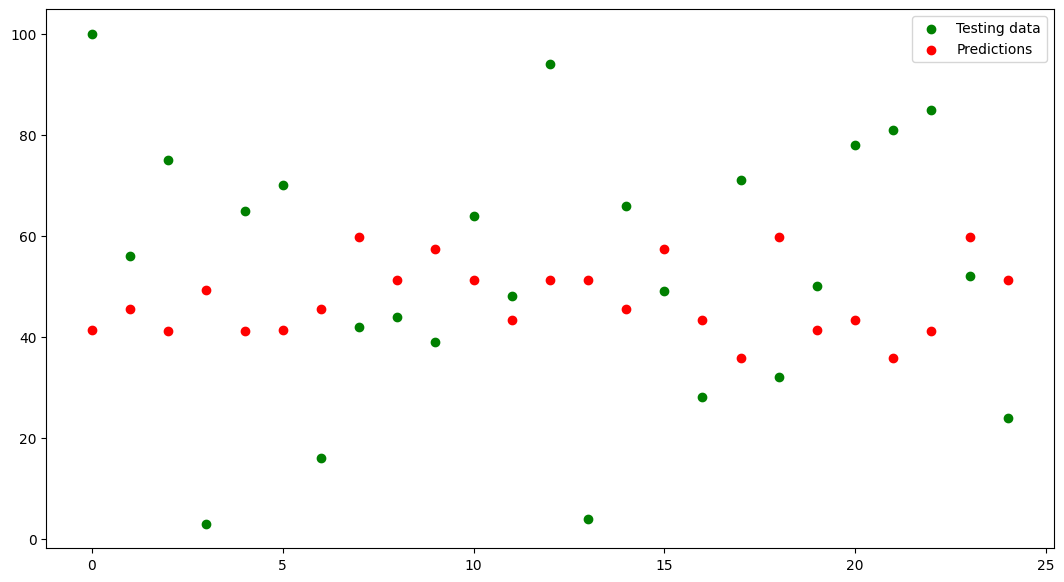

MAE: 26.267282485961914
MSE: 913.1873168945312
R2: -0.38494670391082764


In [ ]:
def plot_predictions(test_X, test_Y, pred_Y):
    plt.figure(figsize=(13, 7))
    plt.scatter(test_X, test_Y, c="g", label="Testing data")
    plt.scatter(test_X, pred_Y, c="r", label="Predictions")
    plt.legend()
    plt.show()

def model_report(y_test, y_pred):
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"R2: {r2_score(y_test, y_pred)}")

y_predict = model_estates_4.predict(X_test_normalized)

y_test = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test
y_predict = tf.squeeze(y_predict).numpy() 

if isinstance(y_test, pd.DataFrame):
    y_test = y_test.iloc[:, 0].to_numpy() 

print(f"Length of y_predict: {len(y_predict)}")
print(f"Length of y_test: {len(y_test)}")

test_X = tf.range(0, len(y_test)).numpy()

print(len(test_X), len(y_test), len(y_predict))

plot_predictions(test_X, y_test, y_predict)

model_report(y_test, y_predict)
